# Convolution is the process to apply a filtering kernel on the image in spatial domain.

# filtering is a method of 'smoothing' images by reducing the amount of intensity variation between neighbouring pixels. The average filter works by moving through the image pixel by pixel, replacing each value with the average value of neighbouring pixels, including itself

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import PIL
import glob


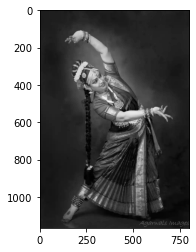

In [2]:
img = cv2.imread('Test.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray,cmap='gray')

padding type: constant, reflect, maximum, mean, median, minimumconstant
padding type:  constant
padded_height,padded_width:  1170 805
image_h:  1170
image_w:  805
kernel_h:  3
kernel_w:  3
Final Image Height:  1168
Final Image Width:  803
(1168, 803)
The orginal image size:  (1166, 801)
print the final value size:  (1168, 803)


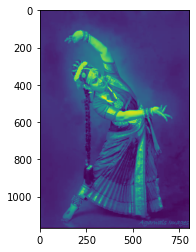

In [9]:
def convolution2d(image, kernel, stride, padding):
    image = np.pad(image, [(padding, padding), (padding, padding)], mode='constant', constant_values=0)

    kernel_height, kernel_width = kernel.shape
    print ("kernel_height: ",kernel_height, kernel_width)

    padded_height, padded_width = image.shape
    print("padded_height,padded_width: ",padded_height, padded_width)

    output_height = (padded_height - kernel_height) // stride + 1
    print("output_height: ",output_height)
    print("stride: ",stride)
    print("padded_height: ",padded_height)
    output_width = (padded_width - kernel_width) // stride + 1
    print("output_width: ",output_width)

    new_image = np.zeros((output_height, output_width)).astype(np.float32)
    print (new_image)
    print ("new_image: ",new_image.shape)

    for y in range(0, output_height):
        for x in range(0, output_width):
            new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
            #print(new_image[y][x])
    return new_image


v= My_conv(gray,filter,1,2)

print ("The orginal image size: ",gray.shape)
print("print the final value size: ",v.shape)
plt.imshow(v)


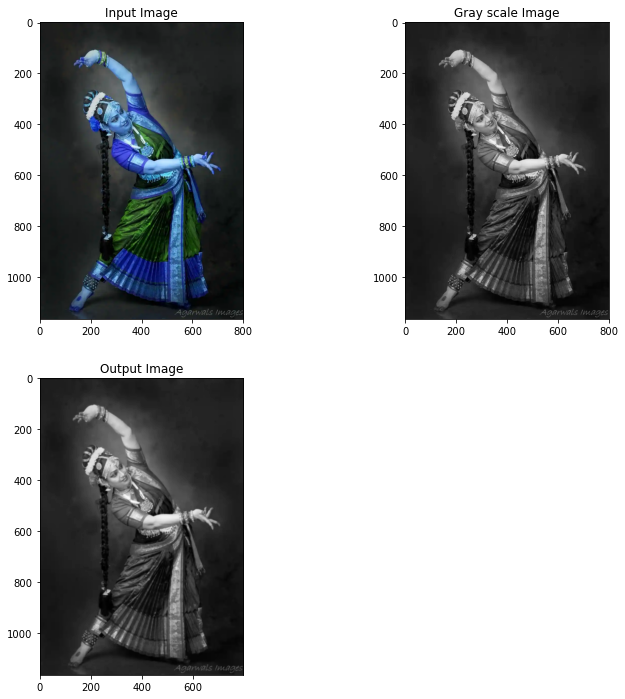

In [6]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(gray,cmap='gray')
ax2.title.set_text('Gray scale Image')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(v,cmap='gray')
ax3.title.set_text('Output Image')
plt.show()

# Ideal high Pass using DFT

 
 * 2d complex array
 ** 2 chanel= 1real and 2 imaginary 
* we going to ge the magnitue of the spectrum (only real values "0") (1) to avoid the warning

(258, 320)


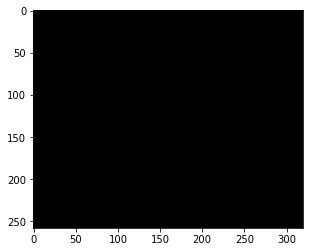

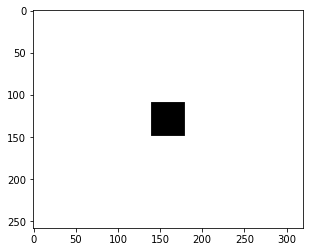

In [40]:
rows, cols = gray.shape
crow, ccol = rows//2, cols//2 
#to go to center row center column
hpf = np.ones(gray.shape)
print(hpf.shape)
plt.imshow(hpf,  cmap='gray')
plt.show()
hpf[crow-20:crow+20,ccol-20:ccol+20] = 0 #20 to top 20 to bottom 20 to right 20 to left 
plt.imshow(hpf,  cmap='gray')
plt.show()


In [41]:
orig_fourier = np.fft.fft2(gray) # we are converting the spacial data of image in to frequency 
centered = np.fft.fftshift(orig_fourier) # to aline the orgin to the center
mag_fourier = np.abs(centered) # Fast Fourier Transform
#For complex input, a + ib, the absolute value is  \sqrt { a^2 + b^2 }.

/var/folders/zp/yykz6vt92kgckn24pqx3zc7w0000gn/T/ipykernel_26987/122564349.py:2: RuntimeWarning: divide by zero encountered in log
  mag_fourier = np.log(np.abs(filtered_spectrum)) # to maximise the min values


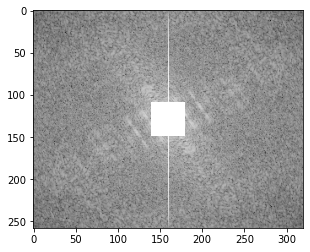

In [42]:
filtered_spectrum = np.multiply(centered,hpf) # filtering step
mag_fourier = np.log(np.abs(filtered_spectrum)) # to maximise the min values
plt.imshow(mag_fourier, cmap='gray')

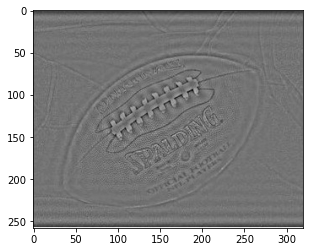

In [43]:
plt.show()
shifting_spectrum = np.fft.ifftshift(filtered_spectrum)
#Inverse DFT to convert back to image domain from the frequency domain.
inverse_fourier = np.real(np.fft.ifft2(shifting_spectrum))
plt.imshow(inverse_fourier,  cmap='gray')

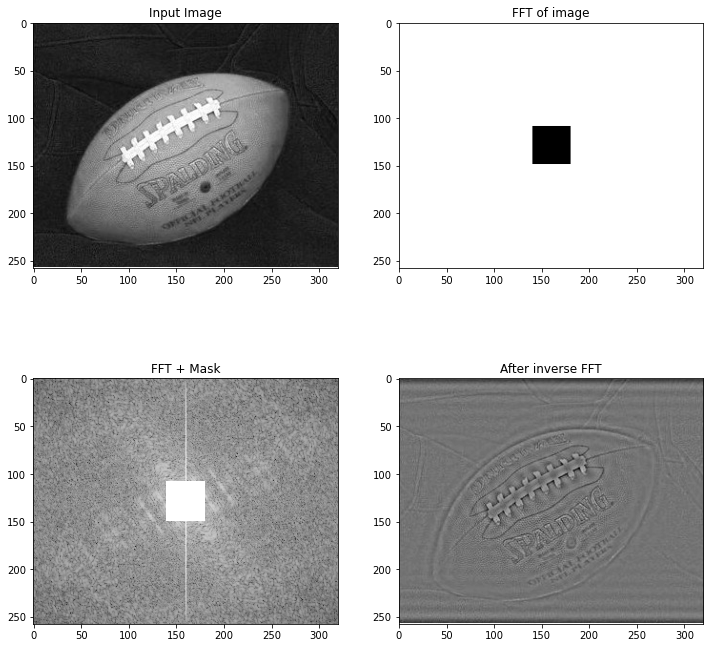

In [44]:
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(lpf, cmap='gray')
ax2.title.set_text('FFT of image')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(mag_fourier, cmap='gray')
ax3.title.set_text('FFT + Mask')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(inverse_fourier, cmap='gray')
ax4.title.set_text('After inverse FFT')
plt.show()

In [3]:
def convolution2d(image, kernel, stride, padding):
    image = np.pad(image, [(padding, padding), (padding, padding)], mode='constant', constant_values=0)

    kernel_height, kernel_width = kernel.shape
    print ("kernel_height: ",kernel_height, kernel_width)

    padded_height, padded_width = image.shape
    print("padded_height,padded_width: ",padded_height, padded_width)

    output_height = (padded_height - kernel_height) // stride + 1
    print("output_height: ",output_height)
    print("stride: ",stride)
    print("padded_height: ",padded_height)
    output_width = (padded_width - kernel_width) // stride + 1
    print("output_width: ",output_width)

    new_image = np.zeros((output_height, output_width)).astype(np.float32)
    print (new_image)
    print ("new_image: ",new_image.shape)

    for y in range(0, output_height):
        for x in range(0, output_width):
            new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
            #print(new_image[y][x])
    return new_image


kernel_height:  9 9
padded_height,padded_width:  1166 801
output_height:  145
stride:  8
padded_height:  1166
output_width:  100
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
new_image:  (145, 100)
The orginal image size:  (1166, 801)
print the final value size:  (145, 100)


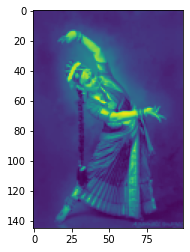

In [8]:
s=convolution2d(gray,filter,8,0)

print ("The orginal image size: ",gray.shape)
print("print the final value size: ",s.shape)
plt.imshow(s)